In [2]:
import numpy as np
import readdy
from readdy.api.utils import load_trajectory_to_npy
import os
import sys
from datetime import datetime
from itertools import product
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
plt.style.use("mystyle-paper.mplstyle")

In [4]:
PD_rates=[0.0001,0.0005,0.001,0.005,0.01]
MCP_rates=[0.0,0.0001,0.0005,0.001,0.005,0.01]
U_v=[0.0,10.0,50.0]
#U_v=[50.0]
repeat=[1.0,2.0,3.0,4.0,5.0]

In [5]:
def get_mean(file,n_mcp=15,plot=False):
    end=4000
    s=10
    try:
        n_particles_per_frame, positions, types, ids = load_trajectory_to_npy(
            file,begin=0,stride=s)
    except (RuntimeError,FileNotFoundError) as e:
        print (f"File {file} not finished: {e}")
        return np.nan
    if (len(positions[:,0,1])<end):
        print(f"file to short {len(positions[:,0,1])}")
        return np.nan
    
    #n_particles_per_frame, positions, types, ids = t.to_numpy(start=0,stride=100)
    if (plot):
        plt.figure()
        #plt.title(file)
        plt.plot(n_particles_per_frame)
        plt.figure()
        #plt.title(file)
        plt.plot(np.mean(positions[:,0:n_mcp,1],axis=1))
    
    return np.mean(np.mean(positions[:end,0:n_mcp,1],axis=1))
    #return np.mean(np.mean(np.diff(positions[:end,0:n_mcp,1],axis=1)))
    #return np.mean(positions[end,0:n_mcp,1])

In [6]:
def get_PD(file):
    try:
    #t = readdy.Trajectory(file)
    #    if (os.path.getsize(file) > 300000000 ):
    #        s=100
    #    else:
    #        s=10
        s=100
        n_particles_per_frame, positions, types, ids = load_trajectory_to_npy(
    file,begin=0,stride=s)
    except (RuntimeError,FileNotFoundError) as e:
        print (f"File {file} not finished: {e}")
        return np.nan

    return n_particles_per_frame

In [7]:
def gen_xyz(file):
    t = readdy.Trajectory(file)
    t.convert_to_xyz(particle_radii={'PD_S': 10,'PD':1,'MCP':62})

In [8]:
def distance_end(file,n_mcp=15):
    n_particles_per_frame, positions, types, ids = load_trajectory_to_npy(
        file,begin=0,stride=1000)
    return(np.linalg.norm(positions[-1,1:n_mcp]-positions[-1,0],axis=1))

In [9]:
def collect_data(folder):
    data=np.empty([len(PD_rates),len(MCP_rates),len(U_v)])
    err=np.empty([len(PD_rates),len(MCP_rates),len(U_v)])
    for pd,i in zip(PD_rates,range(len(PD_rates))):
        for mcp,j in zip(MCP_rates,range(len(MCP_rates))):
            for U,m in zip(U_v,range(len(U_v))):
                tmp=[]
                for r in repeat:
                    file=f"{folder}/gradient_R1R2_{pd}_{mcp}_{U}_{r}.h5"
                    #print(file)
                    tmp.append(get_mean(file))
                #print(tmp)
                data[i,j,m]=np.nanmean(tmp)
                err[i,j,m]=np.nanstd(tmp)
    return [data,err]

In [10]:
[data,err]=collect_data("gradient_R1R2")

File gradient_R1R2/gradient_R1R2_0.0001_0.0_0.0_4.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.0001_0.0_0.0_4.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file

File gradient_R1R2/gradient_R1R2_0.0001_0.0_0.0_5.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.0001_0.0_0.0_5.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file

File gradient_R1R2/gradient_R1R2_0.0001_0.0_10.0_4.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.0001_0.0_10.0_4.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unable to ope

<ipython-input-9-24037bfe631d>:13: RuntimeWarning: Mean of empty slice
  data[i,j,m]=np.nanmean(tmp)
/home/jsk6732/.conda/envs/readdy/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


File gradient_R1R2/gradient_R1R2_0.0001_0.0001_10.0_4.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.0001_0.0001_10.0_4.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file

File gradient_R1R2/gradient_R1R2_0.0001_0.0001_10.0_5.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.0001_0.0001_10.0_5.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file

File gradient_R1R2/gradient_R1R2_0.0001_0.0005_0.0_1.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.0001_0.0005_0.0_1.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessi

File gradient_R1R2/gradient_R1R2_0.0001_0.01_0.0_1.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.0001_0.01_0.0_1.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file

File gradient_R1R2/gradient_R1R2_0.0001_0.01_0.0_2.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.0001_0.01_0.0_2.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file

File gradient_R1R2/gradient_R1R2_0.0001_0.01_0.0_3.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.0001_0.01_0.0_3.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unable to

File gradient_R1R2/gradient_R1R2_0.0005_0.0005_10.0_4.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.0005_0.0005_10.0_4.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file

File gradient_R1R2/gradient_R1R2_0.0005_0.0005_10.0_5.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.0005_0.0005_10.0_5.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file

File gradient_R1R2/gradient_R1R2_0.0005_0.001_0.0_1.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.0005_0.001_0.0_1.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibi

File gradient_R1R2/gradient_R1R2_0.001_0.0_0.0_4.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.001_0.0_0.0_4.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file

File gradient_R1R2/gradient_R1R2_0.001_0.0_0.0_5.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.001_0.0_0.0_5.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file

File gradient_R1R2/gradient_R1R2_0.001_0.0_10.0_4.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.001_0.0_10.0_4.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unable to open file

File gradient_R1R2/gradient_R1R2_0.001_0.001_10.0_4.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.001_0.001_10.0_4.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file

File gradient_R1R2/gradient_R1R2_0.001_0.001_10.0_5.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.001_0.001_10.0_5.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file

File gradient_R1R2/gradient_R1R2_0.001_0.005_0.0_1.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.001_0.005_0.0_1.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unabl

File gradient_R1R2/gradient_R1R2_0.005_0.0001_10.0_4.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.005_0.0001_10.0_4.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file

File gradient_R1R2/gradient_R1R2_0.005_0.0001_10.0_5.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.005_0.0001_10.0_5.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file

File gradient_R1R2/gradient_R1R2_0.005_0.0005_0.0_1.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.005_0.0005_0.0_1.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty)

File gradient_R1R2/gradient_R1R2_0.005_0.01_0.0_1.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.005_0.01_0.0_1.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file

File gradient_R1R2/gradient_R1R2_0.005_0.01_0.0_2.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.005_0.01_0.0_2.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file

File gradient_R1R2/gradient_R1R2_0.005_0.01_0.0_3.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.005_0.01_0.0_3.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unable to open 

File gradient_R1R2/gradient_R1R2_0.01_0.0005_10.0_4.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.01_0.0005_10.0_4.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file

File gradient_R1R2/gradient_R1R2_0.01_0.0005_10.0_5.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.01_0.0005_10.0_5.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file
(File accessibilty) Unable to open file

File gradient_R1R2/gradient_R1R2_0.01_0.001_0.0_1.0.h5 not finished: Failed on opening/creating file gradient_R1R2/gradient_R1R2_0.01_0.001_0.0_1.0.h5: (File accessibilty) Unable to open file
(Virtual File Layer) Unable to initialize object
(File accessibilty) Unable 

In [11]:
data[:,:,-2]

array([[ 17.84876641,   9.01458433, -35.00590492,  -8.0574169 ,
         13.64468157,  -4.3073445 ],
       [-42.45060819, -12.1376087 ,   0.58967993, -22.5270064 ,
         31.49140284,  -9.25012794],
       [-22.10182566,  -7.04712363, -27.41945737,   6.54803461,
          3.95397392,  14.69819551],
       [-15.71292238, -24.19810106, -18.97281868, -15.48910024,
        -12.83822093,  -6.14443389],
       [-29.83944516, -78.92627258,  12.73996651,  11.90558161,
          6.73377595,  -5.20871589]])

In [12]:
data[:,:,0]

array([[ 46.44116574,          nan,          nan,          nan,
                 nan,          nan],
       [ 18.92945059,          nan,          nan,          nan,
                 nan,          nan],
       [ 25.57407716,          nan,          nan,          nan,
                 nan,          nan],
       [ 96.50163069,          nan,          nan,          nan,
                 nan,          nan],
       [209.75031786,          nan,          nan,          nan,
                 nan,          nan]])

In [13]:
err[:,:,-2]

array([[24.32203113, 52.82687764, 25.46489981, 13.27675253, 16.6728447 ,
        51.32438168],
       [25.66255363, 38.27654091, 20.40611066,  8.47576016, 51.29416983,
        17.82787057],
       [66.94794113, 37.72175728, 27.57744702, 27.8283911 , 65.66577004,
        35.00360633],
       [29.48315169, 38.67272921, 29.31048019, 54.28132808, 71.23297303,
        63.59782135],
       [67.89602479, 25.36766738, 64.15933354, 44.49818553, 10.60677736,
        58.28235836]])

In [14]:
#for [n,m] in np.argwhere(np.isnan(data[:,:,-2])):
#    print(f"rm -r gradient_R1R2_{PD_rates[n]}_{MCP_rates[m]}_10.0_1.0*")

In [15]:
err[:,:,-1]

array([[43.49835271, 55.4354874 , 24.33144141, 49.05164487, 49.64312283,
        53.81744327],
       [29.69449578, 51.32963406, 35.20675452, 52.70052836, 20.44337188,
        50.85803277],
       [35.07698801, 65.66667768, 47.46244581, 35.23321281, 32.00052959,
        42.30976415],
       [44.82378566, 37.10398255, 52.58410741, 44.87419229, 13.53011153,
        32.13073924],
       [        nan, 58.00284807, 49.84668158, 39.27038971, 50.66096537,
        33.86515456]])

In [16]:
data[:,:,3]

IndexError: index 3 is out of bounds for axis 2 with size 3

In [ ]:
err[:,:,3]

In [ ]:
get_mean(f"gradient_R1R2/gradient_R1R2_{PD_rates[3]}_{MCP_rates[0]}_{U_v[2]}_2.0.h5")

In [ ]:
get_mean(f"gradient_R1R2/gradient_R1R2_{PD_rates[4]}_{MCP_rates[1]}_{U_v[3]}_5.h5")

In [ ]:
get_mean(f"gradient_R1R2/gradient_R1R2_{PD_rates[-2]}_{MCP_rates[0]}_{U_v[-1]}_2.0.h5")

In [ ]:
get_mean(f"gradient_R1R2/gradient_R1R2_0.01_0.001_50.0_1.0.h5")

In [ ]:
get_mean(f"gradient_R1R2/gradient_R1R2_0.01_0.0_50.0_1.0.h5")

In [ ]:
get_mean(f"gradient_R1R2/gradient_R1R2_0.01_0.0_50.0_3.0.h5")

In [ ]:
get_mean(f"gradient_R1R2/gradient_R1R2_0.005_0.0_50.0_1.0.h5")

In [ ]:
load_trajectory_to_npy(
            "gradient_R1R2/tmp.h5",begin=0,end=1,stride=100)

In [ ]:
t = readdy.Trajectory("gradient_R1R2/gradient_R1R2_0.001_0.0_50.0_1.0.h5")

In [ ]:
t.convert_to_xyz(particle_radii={'PD_S': 10,'PD':1,'MCP':62})

In [ ]:
data=t.to_numpy(start=0)

In [ ]:
len(data[1])

In [ ]:
data[1][-1]

In [ ]:
data[:,1,2]

In [ ]:
data[:,2,2]

In [ ]:
data[:,3,2]

In [ ]:
data[:,:,-2]

In [ ]:
cf=plt.contourf(data[:,:,0])
plt.colorbar(cf, ax=plt.gca())

In [ ]:
data[2,-1,1]

In [ ]:
cf=plt.contourf(data[:,:,-2],range(-90,0,5),cmap=cm.Purples_r)
plt.colorbar(cf, ax=plt.gca())

In [ ]:
cf=plt.contourf(data[:,:,0],cmap=cm.Purples_r)
plt.colorbar(cf, ax=plt.gca())

In [ ]:
data[:,:,0]

In [ ]:
err[:,:,0]

In [ ]:
np.divide(data[:,:,-1],60)

In [ ]:
err[:,:,-1]

In [ ]:
data[3,0,-1]

In [ ]:
data[3,1,-1]

In [ ]:
np.nanmin(np.divide(data[:,0:3,-1],30))

In [ ]:
data[4,0,-1]=-90

In [ ]:
#cf=plt.colorbar(cf, ax=plt.gca())
plt.figure(figsize=[3,2.7])
cf=plt.contourf(np.multiply(MCP_rates[0:5],1000),np.multiply(PD_rates[:],1000),
                np.divide(data[:,0:5,-1],30),np.arange(-3.13,-0.75,0.25),
                cmap=cm.Purples_r)
plt.colorbar(cf, ax=plt.gca(),ticks=[-3,-2, -1,0])
plt.xlim([0.0,2])
#plt.xticks([])
#plt.colorbar(cf, ax=plt.gca())
plt.savefig("Fig 1E.pdf")

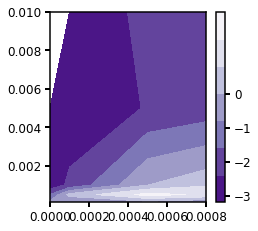

In [50]:
#cf=plt.colorbar(cf, ax=plt.gca())
cf=plt.contourf(MCP_rates[0:4],PD_rates[:],np.divide(data[:,0:4,-1],30),
                cmap=cm.Purples_r)
plt.colorbar(cf, ax=plt.gca(),ticks=[-3,-2, -1,0])
plt.xlim([0.0,0.0008])
#plt.xticks([])
#plt.colorbar(cf, ax=plt.gca())
plt.savefig("Fig 1E.pdf")

In [17]:
MCP_rates[3]

0.001

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


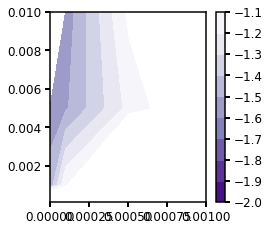

In [18]:
#cf=plt.colorbar(cf, ax=plt.gca())
cf=plt.contourf(MCP_rates[0:4],PD_rates[:],np.divide(data[:,0:4,-1],60),np.arange(-2,-1,0.1),
                cmap=cm.Purples_r)
#plt.colorbar(cf, ax=plt.gca(),ticks=[-2, -0.5, -0.1])
plt.colorbar(cf, ax=plt.gca())

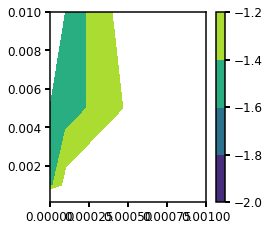

In [19]:
#cf=plt.colorbar(cf, ax=plt.gca())
cf=plt.contourf(MCP_rates[0:4],PD_rates[:],np.divide(data[:,0:4,-1],60),np.arange(-2,-1,0.2))
#plt.colorbar(cf, ax=plt.gca(),ticks=[-2, -0.5, -0.1])
plt.colorbar(cf, ax=plt.gca())

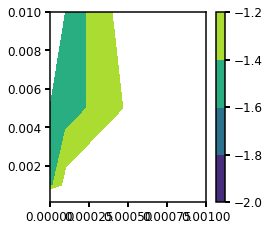

In [20]:
#cf=plt.colorbar(cf, ax=plt.gca())
cf=plt.contourf(MCP_rates[0:4],PD_rates[:],np.divide(data[:,0:4,-1],60),np.arange(-2,-1,0.2))
#plt.colorbar(cf, ax=plt.gca(),ticks=[-2, -0.5, -0.1])
plt.colorbar(cf, ax=plt.gca())

In [21]:
err[:,:,-1]

array([[43.49835271, 55.4354874 , 24.33144141, 49.05164487, 49.64312283,
        53.81744327],
       [29.69449578, 51.32963406, 35.20675452, 52.70052836, 20.44337188,
        50.85803277],
       [35.07698801, 65.66667768, 47.46244581, 35.23321281, 32.00052959,
        42.30976415],
       [44.82378566, 37.10398255, 52.58410741, 44.87419229, 13.53011153,
        32.13073924],
       [        nan, 58.00284807, 49.84668158, 39.27038971, 50.66096537,
        33.86515456]])

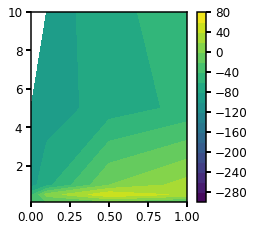

In [22]:
cf=plt.contourf(np.multiply(MCP_rates[0:-2],1000),np.multiply(PD_rates,1000),data[:,0:-2,-1],range(-300,100,20))
plt.colorbar(cf, ax=plt.gca())

In [23]:
PD_rates

[0.0001, 0.0005, 0.001, 0.005, 0.01]

In [24]:
len(data[:,:,-1])

5

Text(0.5, 0, 'MCP_rate')

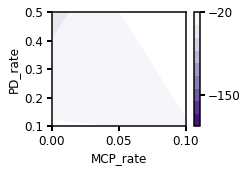

In [25]:
plt.figure(figsize=[3,2.1])
cf=plt.contourf(np.multiply(MCP_rates[0:2],1000),
                np.multiply(PD_rates[0:2],1000),data[0:2,0:2,-1],range(-200,-5,20),cmap=cm.Purples_r)
plt.colorbar(cf, ax=plt.gca(),ticks=[-300, -150, -20])
plt.ylabel("PD_rate")
plt.xlabel("MCP_rate")
#plt.savefig("U_10_map.pdf")

In [26]:
data[2,:,0]

array([25.57407716,         nan,         nan,         nan,         nan,
               nan])

In [27]:
err[:,:,3]

IndexError: index 3 is out of bounds for axis 2 with size 3

In [28]:
get_mean(f"gradient_R1R2/gradient_R1R2_{PD_rates[3]}_{MCP_rates[0]}_{U_v[0]}_1.0.h5")

31.092253050681574

In [29]:
get_mean(f"gradient_R1R2/gradient_R1R2_{PD_rates[3]}_{MCP_rates[0]}_{U_v[-2]}_1.0.h5")

-27.20848577857441

In [30]:
get_mean(f"gradient_R1R2/gradient_R1R2_{PD_rates[-1]}_{MCP_rates[0]}_{U_v[-1]}_2.0.h5")

file to short 3406


nan

In [31]:
t.convert_to_xyz()

NameError: name 't' is not defined

In [ ]:
get_mean(f"gradient_R1R2/gradient_R1R2_{PD_rates[3]}_{MCP_rates[0]}_{U_v[-1]}_5.h5")

In [ ]:
get_mean(f"gradient_R1R2/gradient_R1R2_{PD_rates[3]}_{MCP_rates[2]}_{U_v[0]}_5.h5")

In [ ]:
data[:,:,1]

In [ ]:
get_mean(f"gradient_R1R2/gradient_R1R2_{PD_rates[1]}_{MCP_rates[1]}_{U_v[1]}_5.h5")

In [ ]:
for pd in PD_rates:
    for mcp in MCP_rates:
        for U in U_v:
            print(f"gradient_R1R2_{pd}_{mcp}_{U}_5.h5") # _5 is naming artifact

In [ ]:
np.nan

In [ ]:
from readdy.api.utils import load_trajectory_to_npy


In [ ]:
load_trajectory_to_npy(file)

In [ ]:
data[-2,:,-2]

<ErrorbarContainer object of 3 artists>

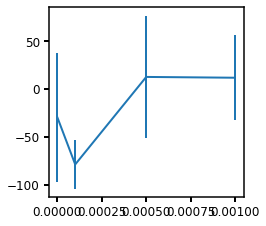

In [32]:
plt.errorbar(MCP_rates[:4],data[-1,:4,1],err[-1,:4,1])
#plt.gca().set_xscale("log", nonpositive='clip')

<ErrorbarContainer object of 3 artists>

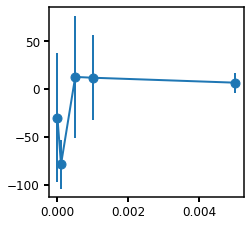

In [33]:
plt.errorbar(np.array(MCP_rates[:5]),data[-1,:5,1],err[-1,:5,1],marker='o')

In [34]:
get_mean(f"gradient_R1R2/gradient_R1R2_{PD_rates[-2]}_{MCP_rates[1]}_{U_v[-2]}_2.0.h5")

-39.16020579889404

In [35]:
PD_rates[-2]

0.005

In [36]:
MCP_rates[1]

0.0001

-58.489321386805585

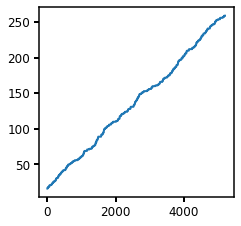

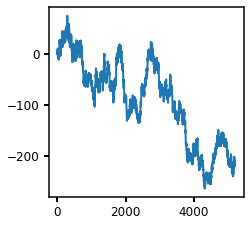

In [37]:
get_mean(f"gradient_R1R2/gradient_R1R2_{PD_rates[-2]}_{MCP_rates[0]}_{U_v[-1]}_1.0.h5",15,True)

-88.27602409523396

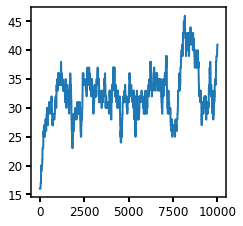

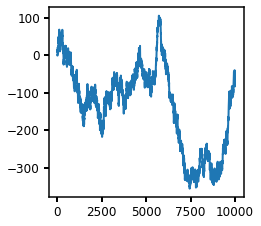

In [38]:
get_mean(f"gradient_R1R2/gradient_R1R2_{PD_rates[-2]}_{MCP_rates[1]}_{U_v[-1]}_2.0.h5",15,True)

In [39]:
gen_xyz(f"gradient_R1R2/gradient_R1R2_{PD_rates[-1]}_{MCP_rates[0]}_{U_v[-2]}_3.0.h5")

-146.45946637714295

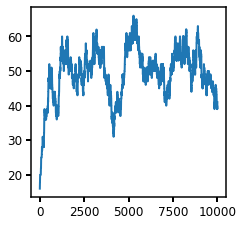

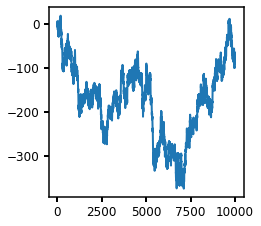

In [40]:
get_mean(f"gradient_R1R2/gradient_R1R2_{PD_rates[-1]}_{MCP_rates[1]}_{U_v[-1]}_3.0.h5",15,True)

In [41]:
gen_xyz(f"gradient_R1R2/gradient_R1R2_{PD_rates[-2]}_{MCP_rates[0]}_{U_v[-2]}_2.0.h5")

In [42]:
gen_xyz(f"gradient_R1R2/gradient_R1R2_{PD_rates[-2]}_{MCP_rates[2]}_{U_v[-2]}_2.0.h5")

In [43]:
data[3,0,-1]

-92.19501296225103

In [44]:
data[3,2,-1]

-70.25697440464856

In [45]:
data[3,0,-1]

-92.19501296225103

In [46]:
PD_rates[3]

0.005

In [47]:
MCP_rates[2]

0.0005

In [48]:
agg=[]
agg=distance_end(f"gradient_R1R2/gradient_R1R2_{PD_rates[3]}_{MCP_rates[0]}_{U_v[-1]}_1.0.h5")
np.append(agg,distance_end(f"gradient_R1R2/gradient_R1R2_{PD_rates[3]}_{MCP_rates[0]}_{U_v[-1]}_2.0.h5"))
np.append(agg,distance_end(f"gradient_R1R2/gradient_R1R2_{PD_rates[3]}_{MCP_rates[0]}_{U_v[-1]}_3.0.h5"))

array([  60.02252743,   59.26948762,   59.60774668,  118.26343322,
        238.48493479,   94.81456927, 1082.0938935 ,   59.63914936,
        453.68985063,  986.88333484,  895.0625242 , 1155.97740627,
        256.85905906, 1073.42915804,   59.36275091,   59.03796996,
         60.47479716,   73.78937069,   58.89808958,   59.53616995,
        604.40622489,  257.35188461,  959.43761303, 1004.50120547,
         60.11213445,  502.78080135,  831.2694821 ,  107.54045929])

In [49]:
nonagg=[]
nonagg=distance_end(f"gradient_R1R2/gradient_R1R2_{PD_rates[3]}_{MCP_rates[2]}_{U_v[-1]}_2.0.h5")
np.append(nonagg,distance_end(f"gradient_R1R2/gradient_R1R2_{PD_rates[2]}_{MCP_rates[2]}_{U_v[-1]}_3.0.h5"))
np.append(nonagg,distance_end(f"gradient_R1R2/gradient_R1R2_{PD_rates[2]}_{MCP_rates[2]}_{U_v[-1]}_4.0.h5"))

array([ 141.76317466,  117.26851268,  524.59752105, 1014.61776158,
        304.0033005 ,  304.64125688, 1051.17276147, 1011.97933798,
        857.06238328,  182.69480178,  108.70630778,  354.63003597,
       1000.47532461,  716.74102485,  949.42666596,  309.09288574,
       1064.77018888,   60.41324783,  117.98857129,  193.14504824,
        178.12292272,  442.44633033,  115.80447005,  220.15782488,
        652.83382987,  938.10589871, 1038.85541249, 1081.54004123])

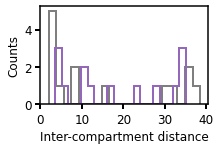

In [50]:
plt.figure(figsize=[3,1.8])
plt.hist(np.divide(agg,30),bins=20,histtype="step",linewidth=2.0,color="tab:gray")
plt.hist(np.divide(nonagg,30),bins=20,histtype="step",linewidth=2.0,color="tab:purple")
#plt.xlim([50,250])
plt.xlabel("Inter-compartment distance")
plt.ylabel("Counts")
plt.xticks([0,10,20,30,40])
plt.savefig("agg-hist.pdf")

In [97]:
nonagg=distance_end(f"gradient_R1R2/gradient_R1R2_{PD_rates[-2]}_{MCP_rates[2]}_{U_v[-2]}_2.0.h5")

In [165]:
3,2.7

0.015

In [163]:
PD_rates[-2]

0.005

In [167]:
MCP_rates[2]

0.001

In [168]:
get_mean(f"gradient_R1R2/gradient_R1R2_{PD_rates[4]}_{MCP_rates[1]}_{U_v[-2]}_2.0.h5")

0.005

In [25]:
t = readdy.Trajectory("gradient_R1R2/gradient_R1R2_0.0001_0.0_50.0_2.0.h5")

RuntimeError: Unable to get link info (bad object header version number)

In [27]:
t = readdy.Trajectory("gradient_R1R2/gradient_R1R2_0.001_0.0_50.0_2.0.h5")

OSError: Unable to open file (file is already open for write (may use <h5clear file> to clear file consistency flags))